# In Vino Veritas
## Dataset from vivino with 4 types of wine and rating

In [2]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
sns.set_context('notebook')
sns.set_style("ticks")
%matplotlib inline

In [4]:
red = pd.read_csv('Red.csv')
red.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [5]:
red['Type']=red.loc[:, 'Type'] = 'Red'
red.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red


In [6]:
sparkling = pd.read_csv('Sparkling.csv')
sparkling['Type']=sparkling.loc[:, 'Type'] = 'Sparkling'

In [7]:
rose = pd.read_csv('Rose.csv')
rose['Type']=rose.loc[:, 'Type'] = 'Rose'

In [8]:
white = pd.read_csv('White.csv')
white['Type']=white.loc[:, 'Type'] = 'White'

In [9]:
wine = pd.concat([red,white,rose,sparkling],ignore_index=True)
wine.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red


In [10]:
varieties = pd.read_csv('Varieties.csv')

In [11]:
wine['Variety'] = np.nan
for index in wine.index:
    for variety in varieties['Variety']:    
        if variety in wine.loc[index, 'Name']:
            wine.loc[index, 'Variety'] = variety
            break

In [12]:
wine.Variety = wine.Variety.fillna('Blend')

### EDA. Ergo bibamus

#### General look

In [13]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  object 
 8   Type             13834 non-null  object 
 9   Variety          13834 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


In [14]:
round(wine.describe(),2)

,Rating,NumberOfRatings,Price
count,13834.00,13834.00,13834.00
mean,3.87,428.32,33.02
std,0.30,1838.41,70.90
min,2.20,25.00,3.15
25%,3.70,56.00,9.90
50%,3.90,129.00,15.95
75%,4.10,336.00,32.50
max,4.90,94287.00,3410.79


From describe info we can deduce NumberOfRatings and Price very spread out over a wider range, possivble alot of outliers

In [15]:
wine['Country'].value_counts().nlargest(15)

Italy            3919
France           3436
Spain            1533
Germany          1229
South Africa      846
United States     530
Austria           492
Chile             431
Portugal          336
Australia         318
Argentina         308
New Zealand       165
Brazil             50
Romania            37
Greece             25
Name: Country, dtype: int64

In [16]:
wine['Region'].value_counts().nlargest(15)

Rioja                      385
Stellenbosch               337
Pfalz                      331
Toscana                    307
Champagne                  263
Südtirol - Alto Adige      227
Mosel                      217
Saint-Émilion Grand Cru    207
Terre Siciliane            176
Barolo                     175
Brunello di Montalcino     168
Ribera del Duero           166
Rheinhessen                163
Chianti Classico           159
Burgenland                 157
Name: Region, dtype: int64

In [17]:
wine['Winery'].value_counts().nlargest(15)

Markus Molitor            73
Errazuriz                 58
Torres                    54
Joseph Drouhin            51
Gaja                      42
M. Chapoutier             42
Antinori                  36
Paul Jaboulet Aîné        36
E. Guigal                 36
Von Winning               34
Gérard Bertrand           33
Château de Saint Cosme    33
Fontanafredda             32
Penfolds                  31
Francis Ford Coppola      31
Name: Winery, dtype: int64

In [18]:
wine['Year'].value_counts().nlargest(15)

2018    2723
2017    2412
2016    2294
2015    1678
2014     905
2019     893
N.V.     744
2013     624
2012     423
2011     312
2010     192
2005     160
2008     101
2009      99
2006      64
Name: Year, dtype: int64

In [19]:
wine['Type'].value_counts().nlargest()

Red          8666
White        3764
Sparkling    1007
Rose          397
Name: Type, dtype: int64

In [20]:
wine['Variety'].value_counts().nlargest(15)

Blend                 8066
Riesling               699
Chardonnay             558
Cabernet Sauvignon     557
Sauvignon Blanc        357
Merlot                 275
Pinot Noir             271
Shiraz                 234
Brunello               172
Syrah                  172
Malbec                 163
Primitivo              123
Prosecco               120
Barbera                119
Tempranillo            117
Name: Variety, dtype: int64

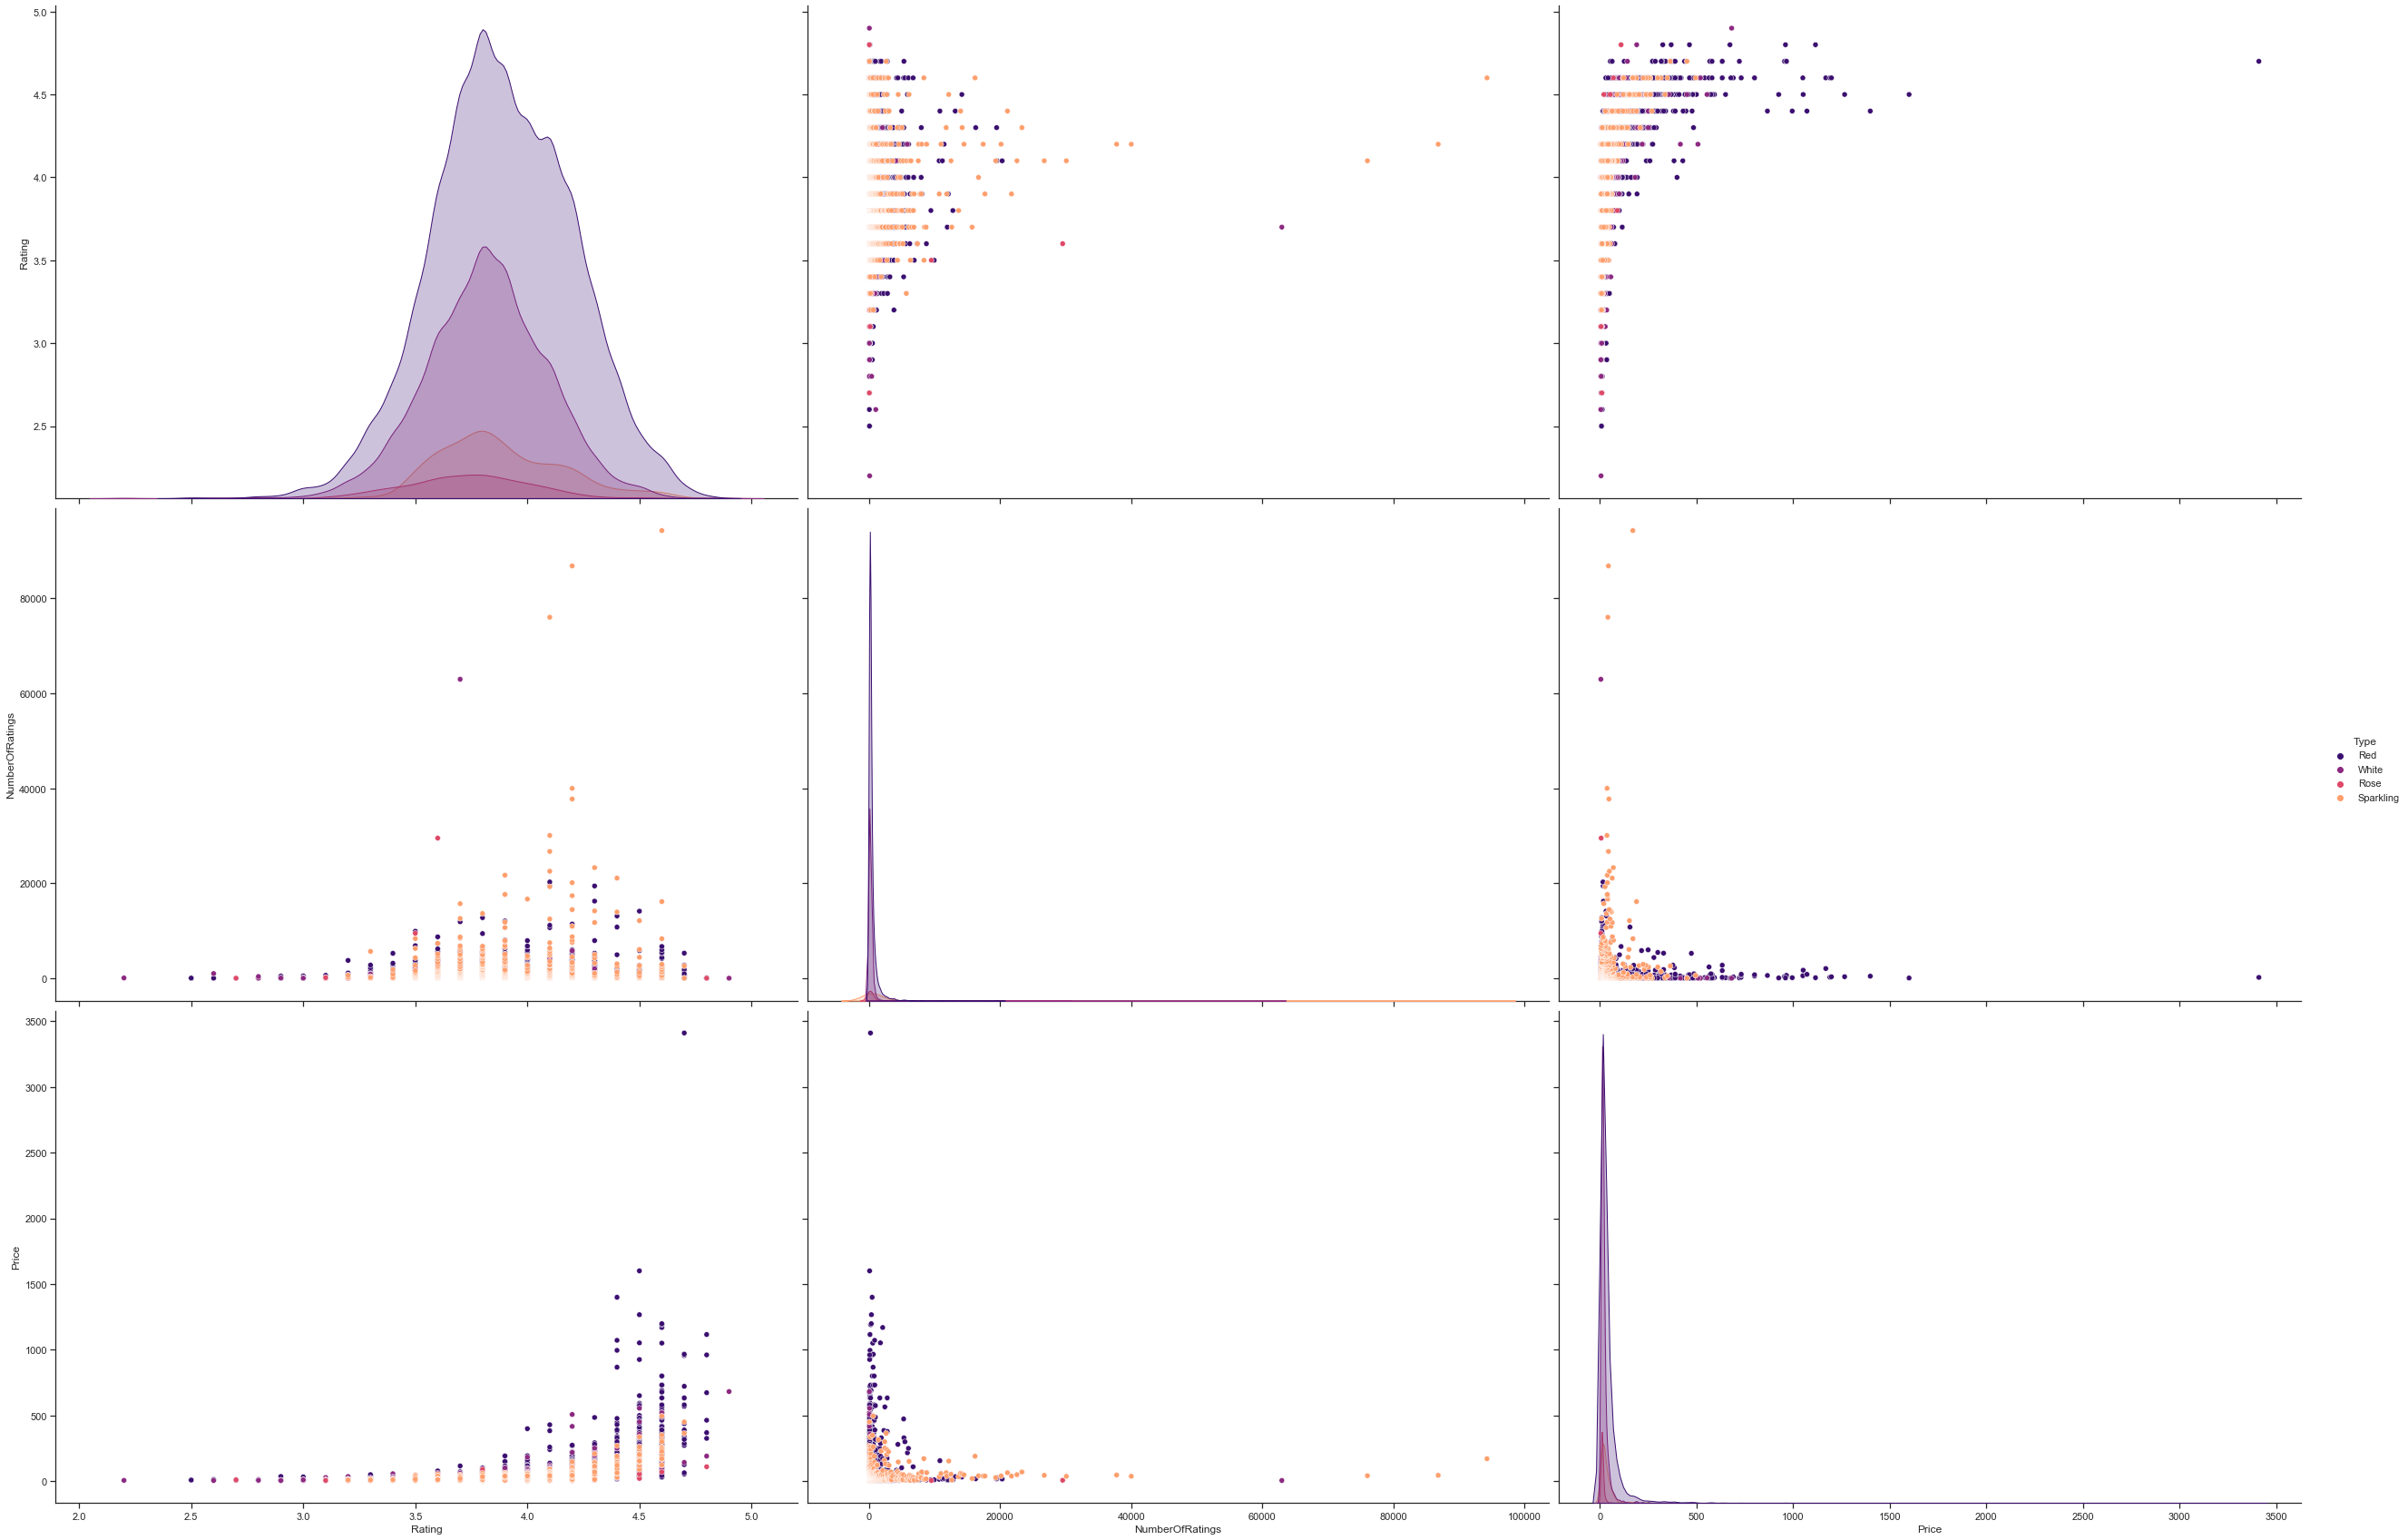

In [21]:
sns.pairplot(wine, hue='Type',aspect=1.5, height=8, palette='magma')

A lot of data is right/left-skewed distribution, lets see more details

#### Rating

##### Total

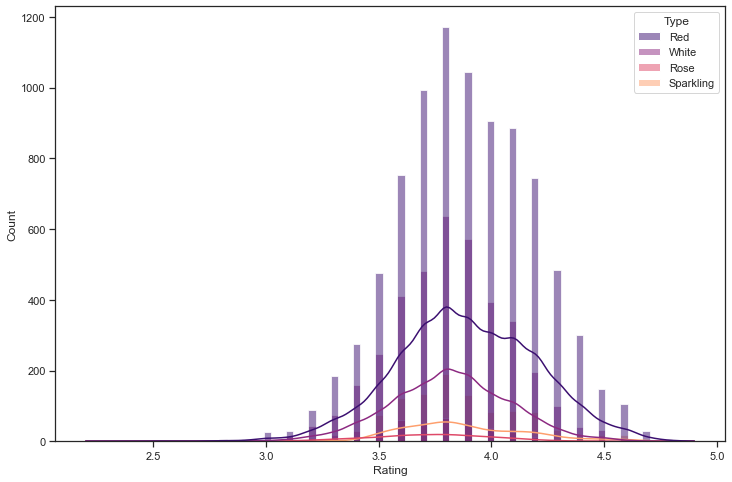

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=wine, x="Rating", kde=True, hue='Type', palette='magma', ax=ax)
plt.show();

##### by Type

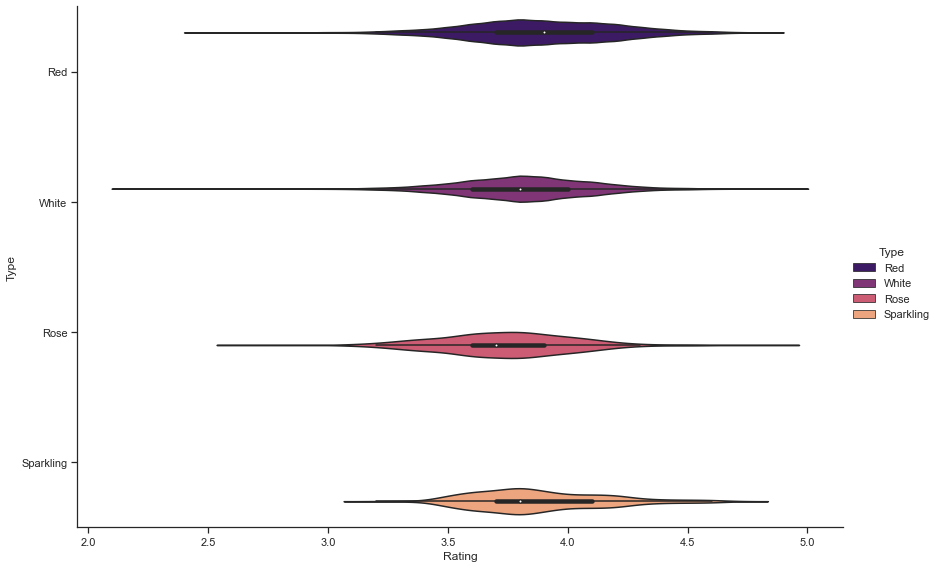

In [23]:
sns.catplot(x="Rating", y="Type", kind="violin", data=wine, hue='Type', palette='magma', aspect=1.5, height=8)
plt.show();

##### by Country

In [24]:
largest_country = wine['Country'].value_counts().loc[wine['Country'].value_counts()>=100]
largest_country

Italy            3919
France           3436
Spain            1533
Germany          1229
South Africa      846
United States     530
Austria           492
Chile             431
Portugal          336
Australia         318
Argentina         308
New Zealand       165
Name: Country, dtype: int64

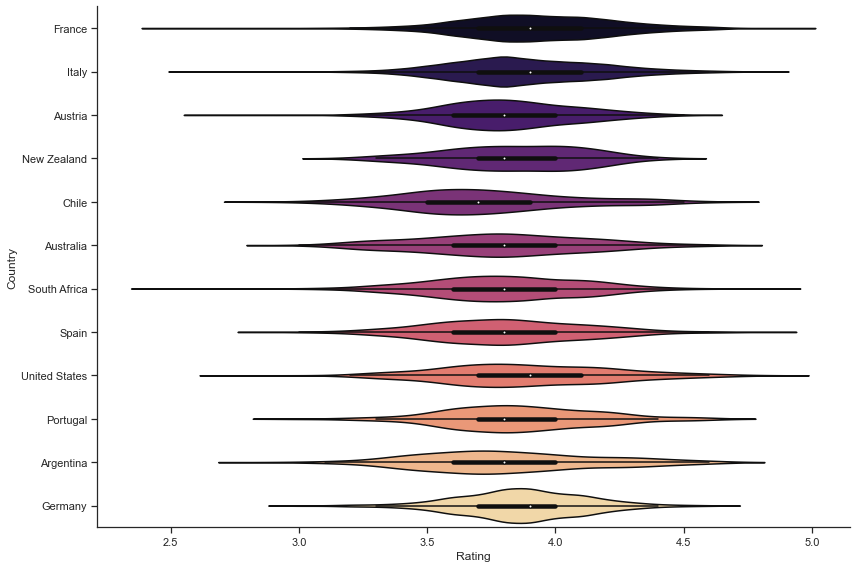

In [25]:
sns.catplot(x="Rating", y="Country", kind="violin", data=wine[wine.Country.isin(largest_country.index.values)], palette='magma', aspect=1.5, height=8)
plt.show();

##### by Price

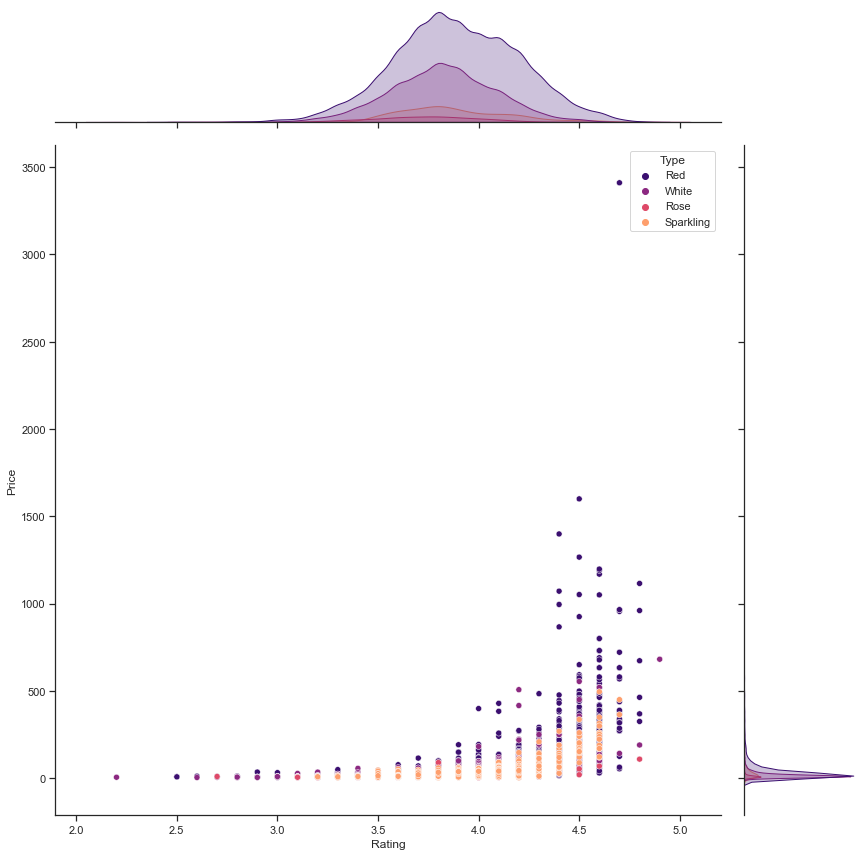

In [26]:
sns.jointplot(data=wine, x="Rating", y="Price", palette='magma', height=12, hue='Type' )
plt.show();

##### by Variety

In [27]:
common_variety = wine['Variety'].value_counts().nlargest(12)
common_variety

Blend                 8066
Riesling               699
Chardonnay             558
Cabernet Sauvignon     557
Sauvignon Blanc        357
Merlot                 275
Pinot Noir             271
Shiraz                 234
Brunello               172
Syrah                  172
Malbec                 163
Primitivo              123
Name: Variety, dtype: int64

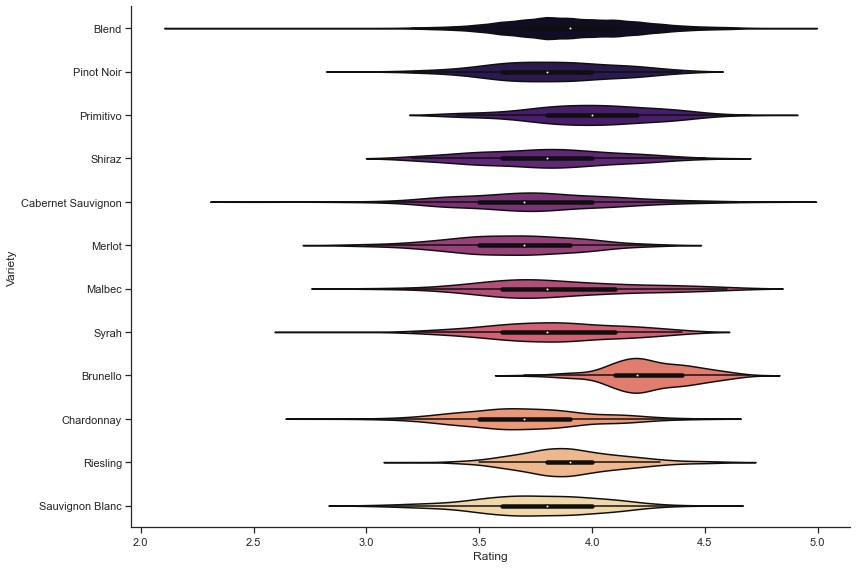

In [28]:
sns.catplot(x="Rating", y="Variety", kind="violin", data=wine[wine.Variety.isin(common_variety.index.values)], palette='magma', aspect=1.5, height=8)
plt.show();

#### Number of Ratings

Total

<Figure size 432x288 with 0 Axes>

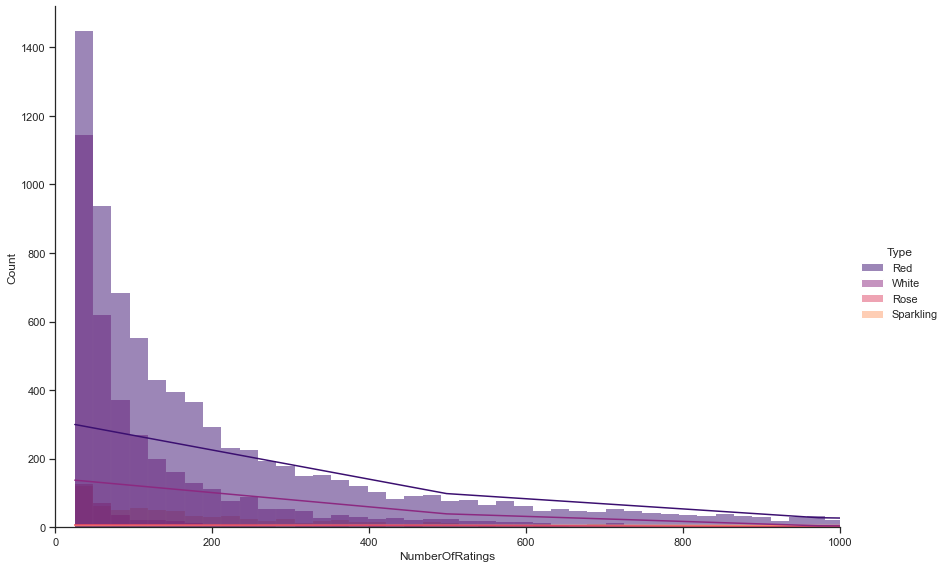

In [29]:
plt.clf()
sns.displot(data=wine, x="NumberOfRatings", kde=True, hue='Type', palette='magma',aspect=1.5, height=8)
plt.xlim(0, 1000)
plt.show();

by Type

<Figure size 432x288 with 0 Axes>

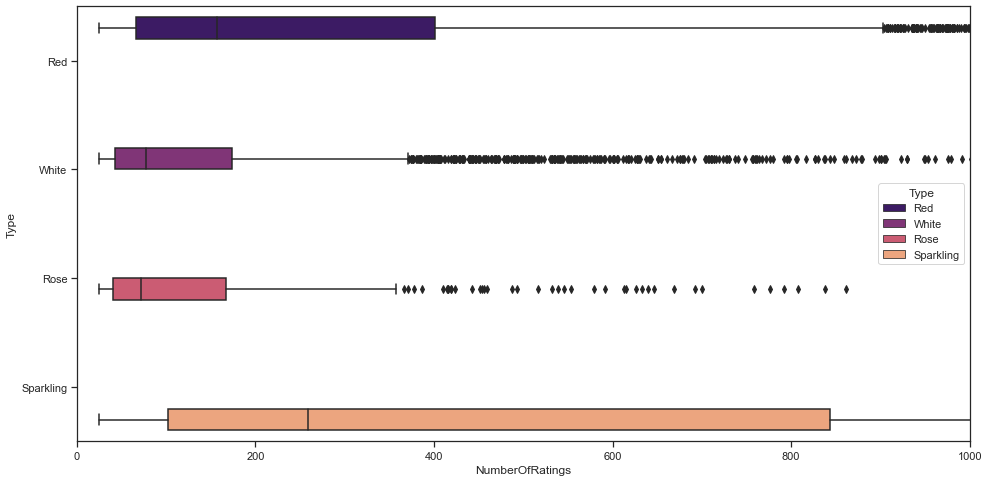

In [30]:
plt.clf()
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x="NumberOfRatings", y="Type", data=wine, hue='Type', palette='magma', ax=ax)
plt.xlim(0,1000)
plt.show();

by Price

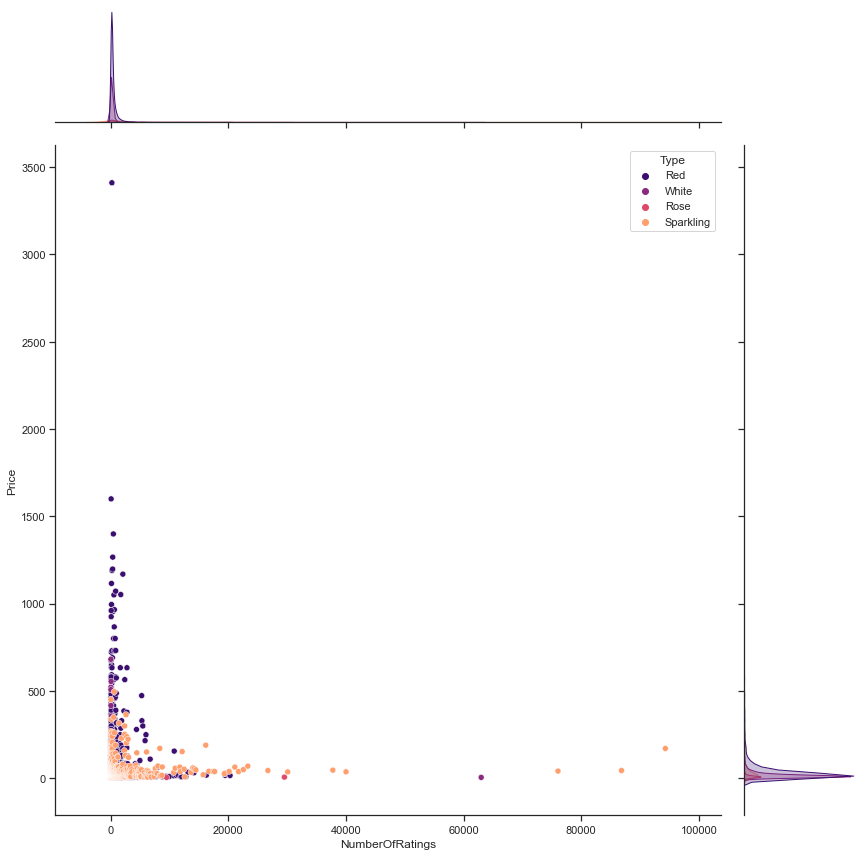

In [31]:
sns.jointplot(data=wine, x="NumberOfRatings", y="Price", hue='Type', palette='magma', height=12)
plt.show();

by Variety

<Figure size 432x288 with 0 Axes>

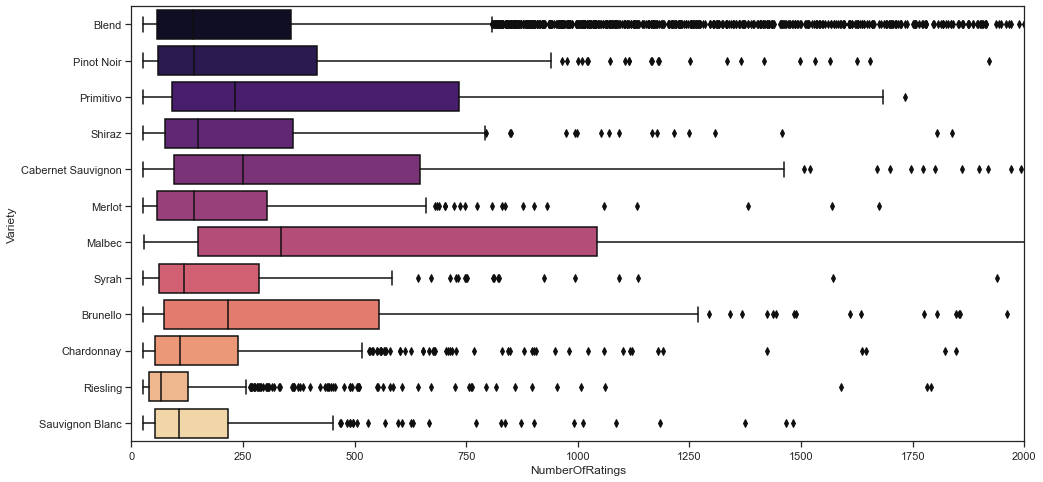

In [42]:
plt.clf()
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x="NumberOfRatings", y="Variety", data=wine[wine.Variety.isin(common_variety.index.values)], palette='magma', ax=ax)
plt.xlim(0,2000)
plt.show();

by Country

<Figure size 432x288 with 0 Axes>

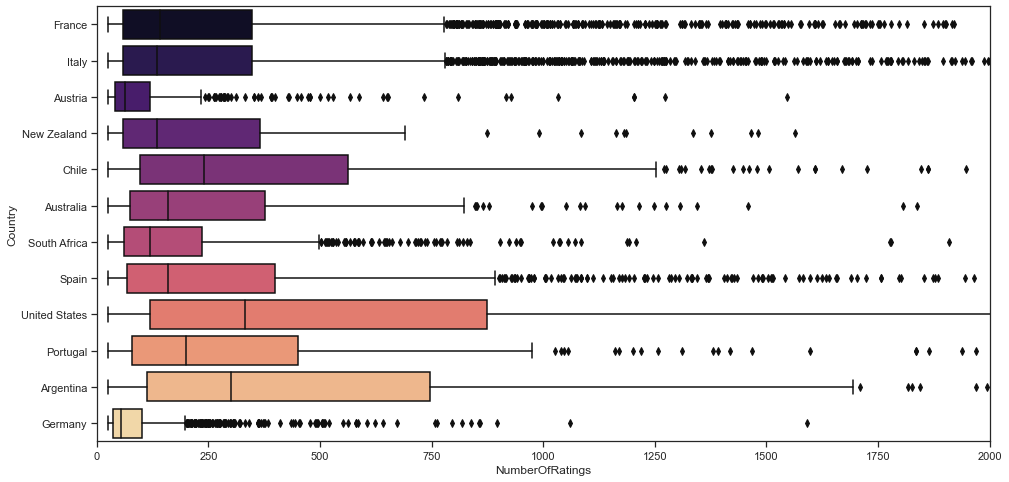

In [43]:
plt.clf()
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x="NumberOfRatings", y="Country", data=wine[wine.Country.isin(largest_country.index.values)], palette='magma', ax=ax)
plt.xlim(0,2000)
plt.show();

#### Price

Total

<Figure size 432x288 with 0 Axes>

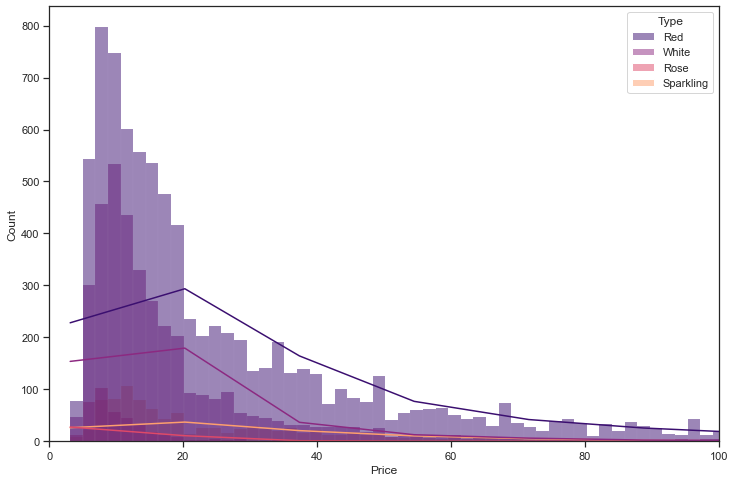

In [99]:
plt.clf()
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=wine, x="Price", kde=True, hue='Type', palette='magma', ax=ax)
plt.xlim(0, 100)
plt.show();

by Type

<Figure size 432x288 with 0 Axes>

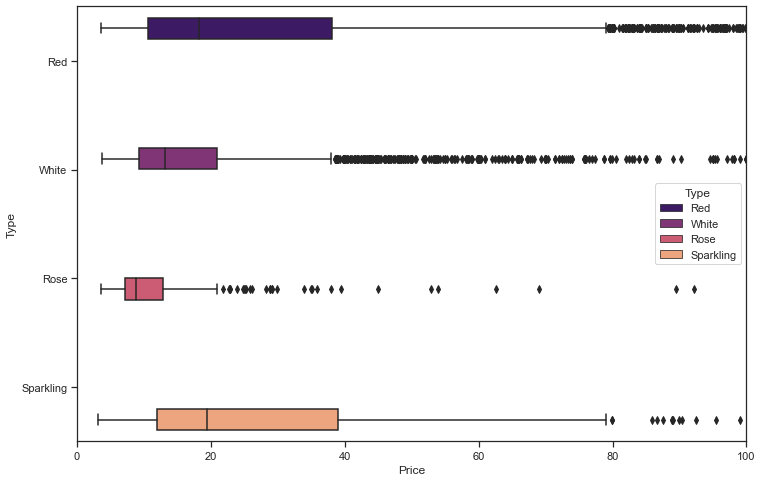

In [141]:
plt.clf()
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x="Price", y="Type", data=wine, hue='Type', palette='magma', ax=ax)
plt.xlim(0, 100)
plt.show();

by Variety

<Figure size 432x288 with 0 Axes>

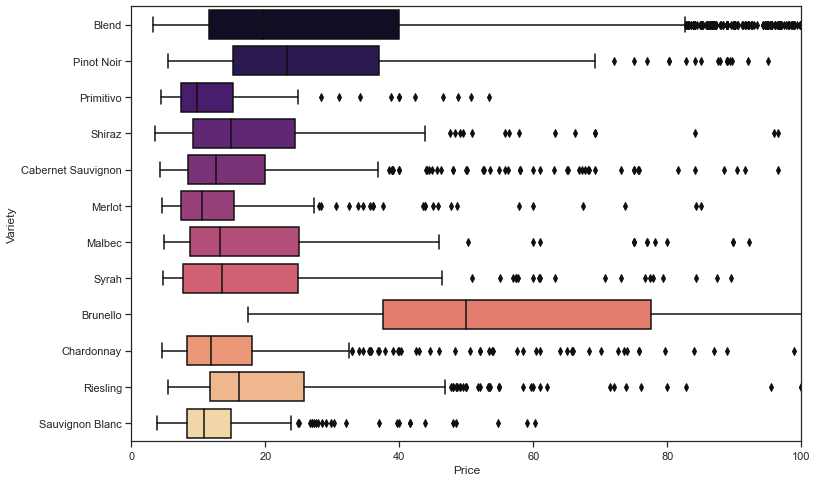

In [46]:
plt.clf()
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x="Price", y="Variety", data=wine[wine.Variety.isin(common_variety.index.values)], palette='magma', ax=ax)
plt.xlim(0, 100)
plt.show();

by Country

<Figure size 432x288 with 0 Axes>

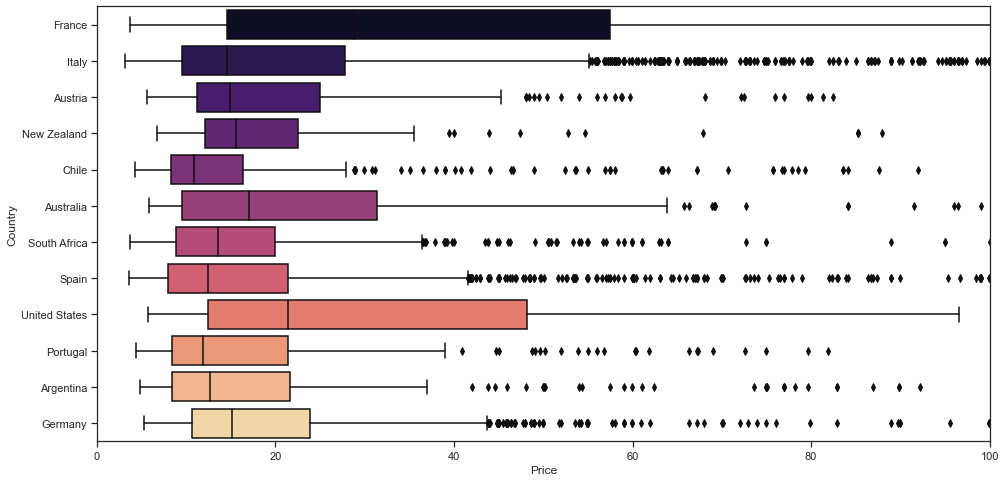

In [50]:
plt.clf()
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x="Price", y="Country", data=wine[wine.Country.isin(largest_country.index.values)], palette='magma', ax=ax)
plt.xlim(0,100)
plt.show();

#### Year

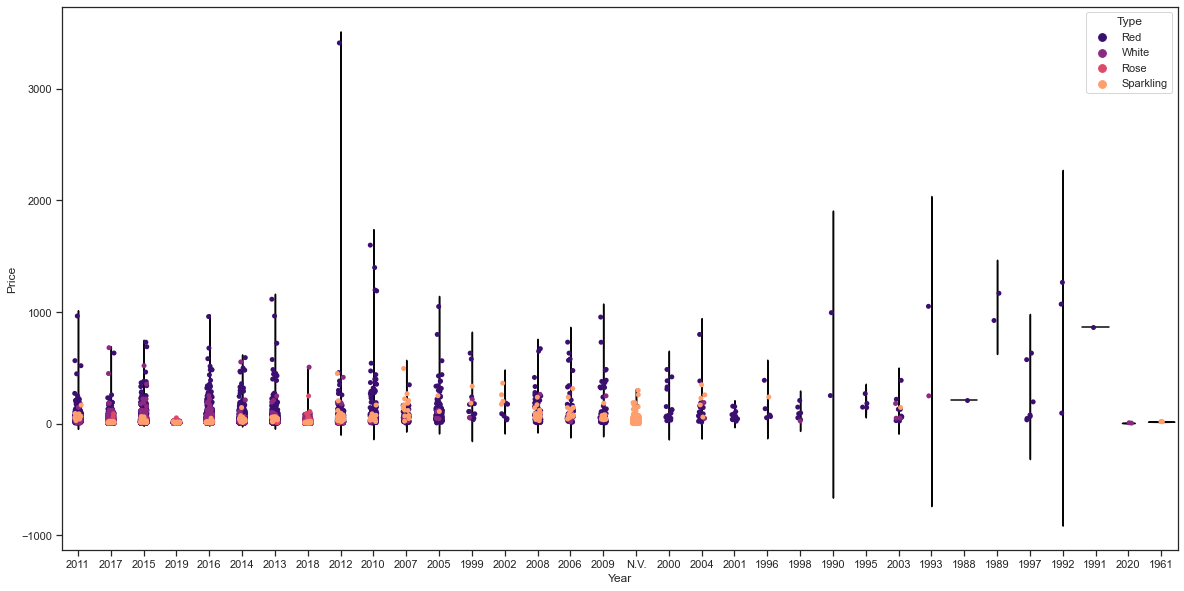

In [139]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="Year", y="Price", data=wine, palette='magma', inner=None, color=".8")
ax = sns.stripplot(x="Year", y="Price", data=wine, hue='Type', palette='magma')

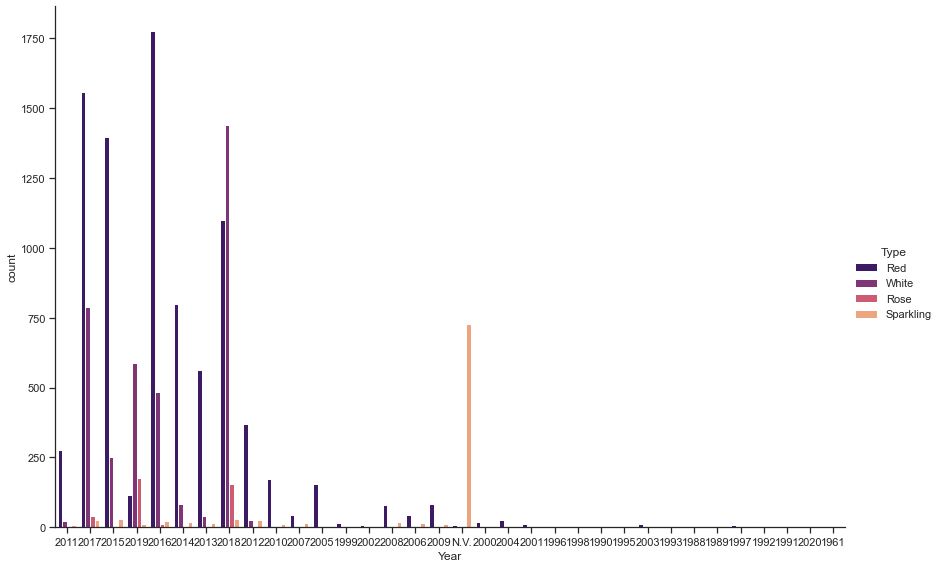

In [102]:
sns.catplot(x="Year", kind='count', data=wine, hue='Type', palette='magma', aspect=1.5, height=8)
plt.show();

In [15]:
wine['Year'].unique()

array(['2011', '2017', '2015', '2019', '2016', '2014', '2013', '2018',
       '2012', '2010', '2007', '2005', '1999', '2002', '2008', '2006',
       '2009', 'N.V.', '2000', '2004', '2001', '1996', '1998', '1990',
       '1995', '2003', '1993', '1988', '1989', '1997', '1992', '1991',
       '2020', '1961'], dtype=object)

N.V.? What is mean?    
According wikipedia:
The opposite of a vintage wine is a nonvintage wine (often seen on a wine list as *NV*), which is usually a blend from the produce of two or more years. This is a common practice for winemakers seeking a consistent style of wine, year on year.   
lets try join plot without N.V.

In [124]:
wine_not_nv = wine[wine['Year']!='N.V.']

In [126]:
wine_not_nv = wine_not_nv.astype({'Year':'int'})

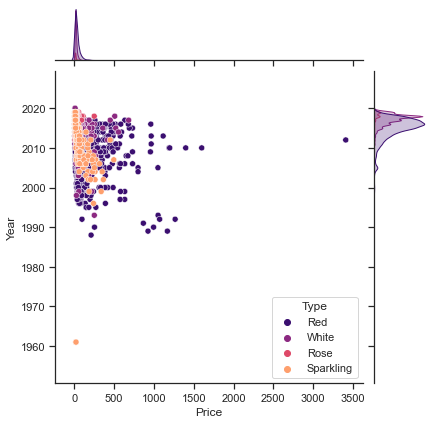

In [127]:
sns.jointplot(data=wine_not_nv, x="Price", y="Year", hue='Type', palette='magma', height=12)

Hooray! omage

In [62]:
wine.pivot_table(columns='Type',index='Year',values='Rating', aggfunc='count', fill_value=0, margins=True)

Type,Red,Rose,Sparkling,White,All
Year,,,,,
1961,0,0,3,0,3
1988,1,0,0,0,1
1989,2,0,0,0,2
1990,2,0,0,0,2
1991,1,0,0,0,1
1992,3,0,0,0,3
1993,1,0,0,1,2
1995,4,0,0,0,4
1996,5,0,1,0,6


#TODO: chek for normality https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [52]:
from scipy import stats

In [69]:
def normality(df,column):
    statistic, p_value = stats.normaltest(df[column])
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    return statistic, p-p_value    

In [70]:
stat, p = normality(wine,'Price')

Sample does not look Gaussian (reject H0)


In [71]:
stat, p = normality(wine,'NumberOfRatings')

Sample does not look Gaussian (reject H0)


In [72]:
stat, p = normality(wine,'Rating')

Sample does not look Gaussian (reject H0)


As we see, large amount of N.V. from Sprakling wine, in addition Sprakling wine data more problematic within outliers
In additon many outliers in Price and Number of Raitngs, also data is Right Skewed.
Lets try log transformation on problematic data

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
wine[['Price']] = pd.DataFrame(pt.fit_transform(wine[['Price']]), columns=['Price'])

In [ ]:
wine[['Price']].hist(figsize=(14,5))